In [247]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import sys
import seaborn as sns

In [157]:
# !{sys.executable} -m pip install seaborn

In [ ]:
import

In [558]:
for k in matplotlib.rcParams.keys():
    if 'title' in k:
        print(k)

axes.titlecolor
axes.titlelocation
axes.titlepad
axes.titlesize
axes.titleweight
axes.titley
figure.titlesize
figure.titleweight
legend.title_fontsize


In [529]:
single_plot_params = {
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans'],
    'svg.fonttype': 'none',
    'text.usetex': False,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size': 24,
    
    'axes.labelsize': 24,
    'axes.titlesize': 24,
    'axes.labelpad': 2,
    'axes.linewidth': 0.5,
    'axes.titlepad': 4,
    
    'lines.linewidth': 5,
    'lines.markersize':15,
    
    'legend.fontsize': 24,
    'legend.title_fontsize': 16,
    
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'xtick.major.size': 2,
    'xtick.major.pad': 1,
    'xtick.major.width': 0.5,
    'ytick.major.size': 2,
    'ytick.major.pad': 1,
    'ytick.major.width': 0.5,
    'xtick.minor.size': 2,
    'xtick.minor.pad': 1,
    'xtick.minor.width': 0.5,
    'ytick.minor.size': 2,
    'ytick.minor.pad': 1,
    'ytick.minor.width': 0.5,

    # Avoid black unless necessary
    'text.color': _new_black,
    'patch.edgecolor': _new_black,
    'patch.force_edgecolor': False, # Seaborn turns on edgecolors for histograms by default and I don't like it
    'hatch.color': _new_black,
    'axes.edgecolor': _new_black,
    # 'axes.titlecolor': _new_black # should fallback to text.color
    'axes.labelcolor': _new_black,
    'xtick.color': _new_black,
    'ytick.color': _new_black

    # Default colormap - personal preference
    # 'image.cmap': 'inferno'
}

In [559]:
multi_plot_params = {
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans'],
    'svg.fonttype': 'none',
    'text.usetex': False,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size': 24,
    
    'axes.labelsize': 30,
    'axes.titlesize': 32,
    'axes.labelpad': 2,
    'axes.linewidth': 0.5,
    'axes.titlepad': 4,
    
    'lines.linewidth': 5,
    'lines.markersize':15,
    
    'legend.fontsize': 24,
    'legend.title_fontsize': 16,
    
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'xtick.major.size': 2,
    'xtick.major.pad': 3,
    'xtick.major.width': 0.5,
    'ytick.major.size': 2,
    'ytick.major.pad': 1,
    'ytick.major.width': 0.5,
    'xtick.minor.size': 2,
    'xtick.minor.pad': 1,
    'xtick.minor.width': 0.5,
    'ytick.minor.size': 2,
    'ytick.minor.pad': 1,
    'ytick.minor.width': 0.5,

    # Avoid black unless necessary
    'text.color': _new_black,
    'patch.edgecolor': _new_black,
    'patch.force_edgecolor': False, # Seaborn turns on edgecolors for histograms by default and I don't like it
    'hatch.color': _new_black,
    'axes.edgecolor': _new_black,
    # 'axes.titlecolor': _new_black # should fallback to text.color
    'axes.labelcolor': _new_black,
    'xtick.color': _new_black,
    'ytick.color': _new_black

    # Default colormap - personal preference
    # 'image.cmap': 'inferno'
}

In [160]:
_new_black = '#373737'


In [161]:
def tol_cset(colorset=None):
    """
    Discrete color sets for qualitative data.

    Define a namedtuple instance with the colors.
    Examples for: cset = tol_cset(<scheme>)
      - cset.red and cset[1] give the same color (in default 'bright' colorset)
      - cset._fields gives a tuple with all color names
      - list(cset) gives a list with all colors
    """
    from collections import namedtuple
    
    namelist = ('bright', 'high-contrast', 'vibrant', 'muted', 'medium-contrast', 'light')
    if colorset == None:
        return namelist
    if colorset not in namelist:
        colorset = 'bright'
        print('*** Warning: requested colorset not defined,',
              'known colorsets are {}.'.format(namelist),
              'Using {}.'.format(colorset)) 

    if colorset == 'bright':
        cset = namedtuple('Bcset',
                    'blue red green yellow cyan purple grey black')
        return cset('#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE',
                    '#AA3377', '#BBBBBB', '#000000')

    if colorset == 'high-contrast':
        cset = namedtuple('Hcset',
                    'blue yellow red black')
        return cset('#004488', '#DDAA33', '#BB5566', '#000000')

    if colorset == 'vibrant':
        cset = namedtuple('Vcset',
                    'orange blue cyan magenta red teal grey black')
        return cset('#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311',
                    '#009988', '#BBBBBB', '#000000')

    if colorset == 'muted':
        cset = namedtuple('Mcset',
                    'rose indigo sand green cyan wine teal olive purple pale_grey black')
        return cset('#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
                    '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
                    '#000000')

    if colorset == 'medium-contrast':
        cset = namedtuple('Mcset',
                    'light_blue dark_blue light_yellow dark_red dark_yellow light_red black')
        return cset('#6699CC', '#004488', '#EECC66', '#994455', '#997700',
                    '#EE99AA', '#000000')

    if colorset == 'light':
        cset = namedtuple('Lcset',
                    'light_blue orange light_yellow pink light_cyan mint pear olive pale_grey black')
        return cset('#77AADD', '#EE8866', '#EEDD88', '#FFAABB', '#99DDFF',
                    '#44BB99', '#BBCC33', '#AAAA00', '#DDDDDD', '#000000')

In [162]:
tol_cset('bright')

Bcset(blue='#4477AA', red='#EE6677', green='#228833', yellow='#CCBB44', cyan='#66CCEE', purple='#AA3377', grey='#BBBBBB', black='#000000')

# Stochastic Volatililty

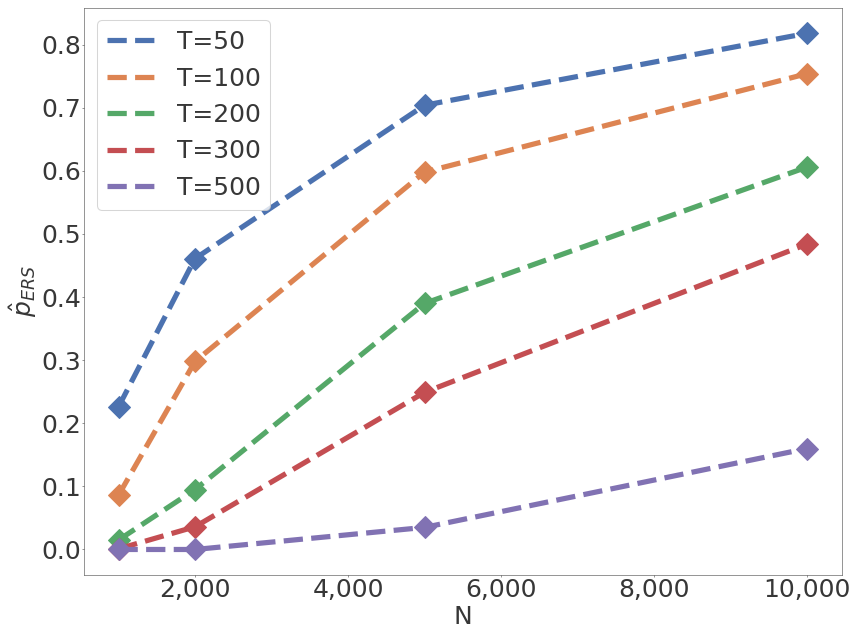

In [598]:
fp = '/data/greyostrich/oxwasp/oxwasp18/thornton/EnsembleRejectionSampler/ers/stoch_vol_results.csv'

df = pd.read_csv(fp)

Ts = df['T'].unique()
Ts.sort()
Ts

sns.set_theme(style='ticks', font_scale=0.75, rc=single_plot_params)

fig, ax = plt.subplots(figsize=(12, 9), dpi=75)

colors = ['red', 'green', 'blue', 'pink', 'orange']

col_map = sns.color_palette()

colors = np.arange(len(Ts))

for T, col_i in zip(Ts, colors):
    plot_df = df[df['T']==T]
    x =  plot_df['N'].values
    y =  plot_df['p_acc'].values

    ax.plot(x, y, '--', c=col_map[col_i], label=f"T={T}")
    ax.plot(x, y, 'D', c=col_map[col_i])
plt.legend()
# plt.title('Stochastic Volatility')
plt.xlabel('N')
plt.ylabel('$\hat{p}_{ERS}$')
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.savefig('sv_pacc.png')
plt.show()

In [545]:
df.loc[:,['p_acc', 'N', 'T']] \
.set_index(['N', 'T']) \
.unstack('T')

p_acc                            
T        50     100    200    300    500
N                                       
1000   0.226  0.086  0.015  0.001  0.000
2000   0.461  0.298  0.095  0.036  0.000
5000   0.704  0.598  0.390  0.249  0.035
10000  0.818  0.754  0.606  0.484  0.160

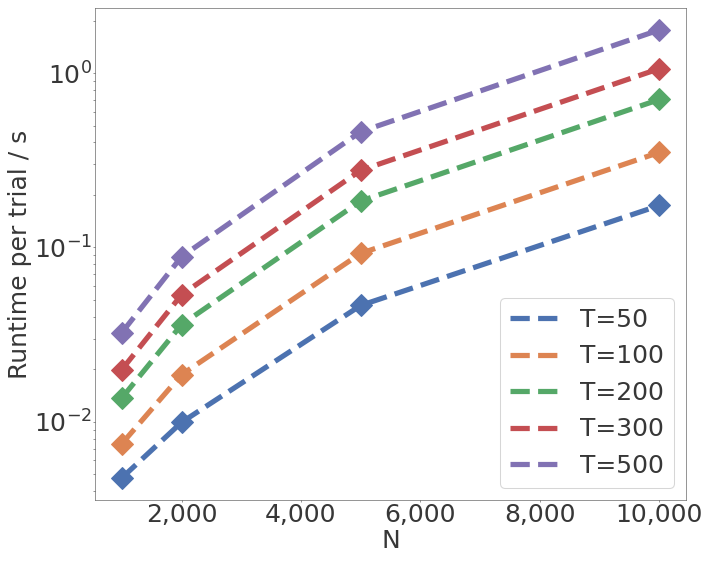

In [599]:
sns.set_theme(style='ticks', font_scale=0.75, rc=single_plot_params)
fig, ax = plt.subplots(figsize=(10, 8), dpi=75)

colors = ['red', 'green', 'blue', 'pink', 'orange']

col_map = sns.color_palette()

colors = np.arange(len(Ts))

for T, col_i in zip(Ts, colors):
    plot_df = df[df['T']==T]
    x =  plot_df['N'].values
    y =  plot_df['duration'].values / plot_df['n_trials']

    ax.plot(x, y, '--', c=col_map[col_i], label=f"T={T}")
    ax.plot(x, y, 'D', c=col_map[col_i])
    ax.set_yscale('log')
plt.legend()
# plt.title('Stochastic Volatility')
plt.xlabel('N')
plt.ylabel('Runtime per trial / s')
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.savefig('sv_runtime.png')
plt.show()

# Hard obstacle

In [627]:
fp = '/data/greyostrich/oxwasp/oxwasp18/thornton/EnsembleRejectionSampler/ers/hardobstacle_results.csv'
df = pd.read_csv(fp)

In [628]:

sns.set_theme(style='ticks', font_scale=0.75, rc=multi_plot_params)

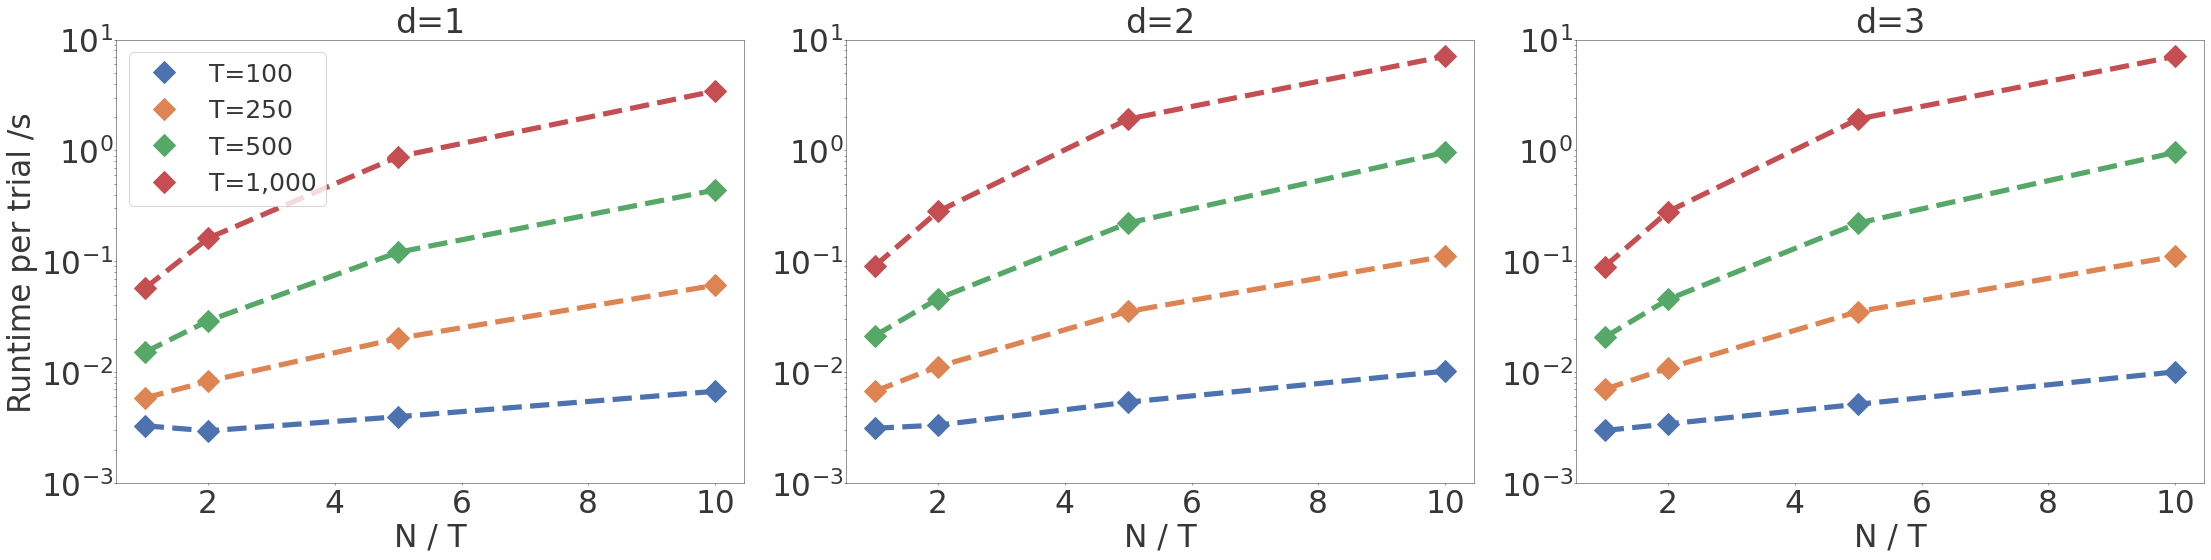

In [629]:
plot_df = df.copy()
plot_df['N'] = (plot_df['N'] / plot_df['T']).astype(int)

col_map = sns.color_palette(n_colors=len(Ts)*3)

fig, ax = plt.subplots(1,3,figsize=(30, 8), dpi=75)
for i, d in enumerate([1,2,3]):
    for col_i, T in enumerate([100,  250,  500, 1000]):
        rview = (plot_df['d'] == d) & (plot_df['T']==T)
        x = plot_df.loc[rview, 'N']
        y = (plot_df.loc[rview,'duration'] / plot_df.loc[rview,'n_trials'])
        ax[i].plot(x, y, 'D', c=col_map[col_i], label=f'T={T:,}')
        ax[i].plot(x, y, '--', c=col_map[col_i])
        ax[i].set_title(f'd={d}')
        ax[i].set_xlabel('N / T')
        ax[i].set_ylim(0.001,10)
        ax[i].set_yscale('log')
        ax[i].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].legend()

ax[0].set_ylabel('Runtime per trial /s')
plt.tight_layout()
plt.savefig('rw_runtime.png')
plt.show()

In [492]:

plot_df = df.copy()
plot_df['N'] = (plot_df['N'] / plot_df['T']).astype(int).map(lambda x: f"{x}T")
plot_df = plot_df.loc[:, ['d','p_acc', 'T', 'N']]
plot_df = plot_df.set_index(['d','T','N']).unstack('N')
plot_df.columns = plot_df.columns.get_level_values(1)
plot_df.loc[:,['1T', '2T', '5T', '10T']]
plot_df.to_csv('rw_pacc.csv')

In [323]:
plot_df

,Unnamed: 0,n_trials,n_accepts,p_acc,duration,N,T,d
38,38,1000,0,0.000,89.749584,1000,1000,3
41,41,1000,0,0.000,281.074923,2000,1000,3
44,44,1000,17,0.017,1918.721371,5000,1000,3
47,47,1000,125,0.125,7040.364608,10000,1000,3


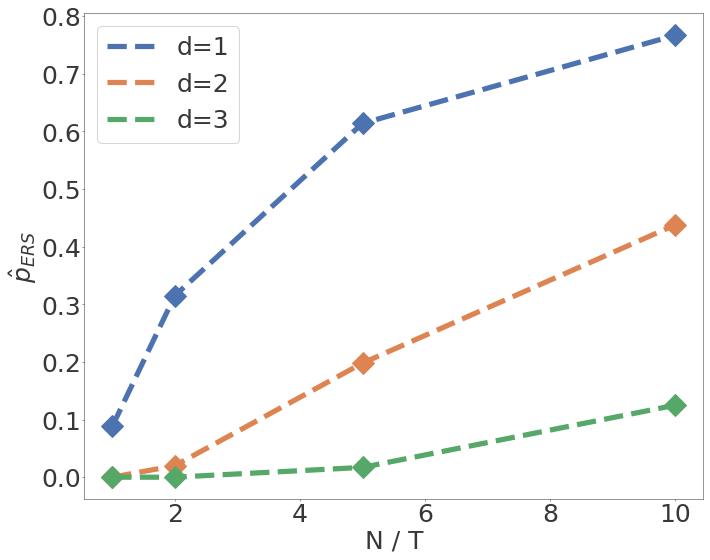

In [603]:
sns.set_theme(style='ticks', font_scale=0.75, rc=single_plot_params)
fig, ax = plt.subplots(figsize=(10, 8), dpi=75)

colors = ['red', 'green', 'blue', 'pink', 'orange']

col_map = sns.color_palette()

colors = np.arange(3)
T = 1_000



for d, col_i in zip([1,2,3], colors):
    rview = (df['T']==T) & (df['d']==d)
    plot_df = df[rview].copy()
    plot_df['N'] = plot_df['N'] / plot_df['T']
    x =  plot_df['N'].values
    y =  plot_df['p_acc'].values

    ax.plot(x, y, '--', c=col_map[col_i], label=f"d={d}")
    ax.plot(x, y, 'D', c=col_map[col_i])
    
plt.legend()
plt.title('')
plt.xlabel('N / T')
plt.ylabel('$\hat{p}_{ERS}$')
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.savefig('rw_pacc_d1000_relative.png')
plt.show()

In [494]:

plot_df = df.copy()
plot_df['N'] = (plot_df['N'] / plot_df['T']).astype(int).map(lambda x: f"{x}T")
plot_df = plot_df.loc[:, ['d','duration', 'T', 'N']]
plot_df = plot_df.set_index(['d','T','N']).unstack('N')
plot_df.columns = plot_df.columns.get_level_values(1)
plot_df.loc[:,['1T', '2T', '5T', '10T']]
plot_df.to_csv('rw_runtime.csv')

In [173]:

sns.set_theme(style='ticks', font_scale=0.75, rc=multi_plot_params)

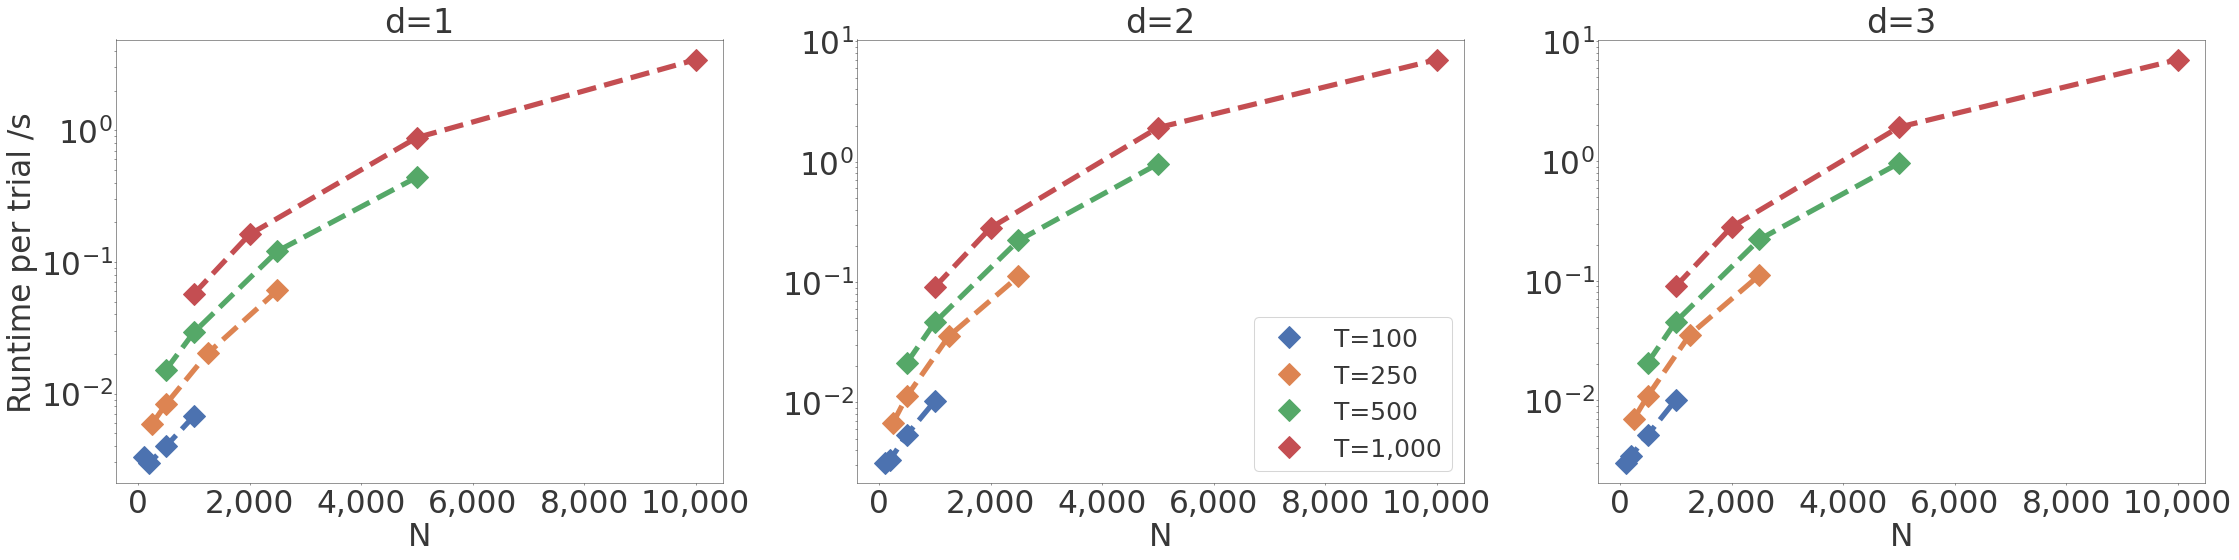

In [562]:
plot_df = df.copy()
plot_df['N'] = plot_df['N'] #/ plot_df['T']).astype(int)

col_map = sns.color_palette(n_colors=len(Ts)*3)

fig, ax = plt.subplots(1,3,figsize=(30, 8), dpi=75)
for i, d in enumerate([1,2,3]):
    for col_i, T in enumerate([100,  250,  500, 1000]):
        rview = (plot_df['d'] == d) & (plot_df['T']==T)
        x = plot_df.loc[rview, 'N']#.map(lambda x: f"{x}T")
        y = (plot_df.loc[rview,'duration'] / plot_df.loc[rview,'n_trials'] )
        ax[i].plot(x, y, 'D', c=col_map[col_i], label=f'T={T:,}')
        ax[i].plot(x, y, '--', c=col_map[col_i])
        ax[i].set_title(f'd={d}')
        ax[i].set_xlabel('N')
        ax[i].set_yscale('log')
        ax[i].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[1].legend()
plt.tight_layout()
ax[0].set_ylabel('Runtime per trial /s')
plt.savefig('rw_runtime_nonrelative.png')
plt.show()

# Nonlinear AR

In [284]:
# fp = '/data/greyostrich/oxwasp/oxwasp18/thornton/EnsembleRejectionSampler/ers/nonlinear_ar_results_5k.csv'
# df = pd.read_csv(fp)
# fp_10 = '/data/greyostrich/oxwasp/oxwasp18/thornton/EnsembleRejectionSampler/ers/nonlinear_ar_results.csv'
# df_10 = pd.read_csv(fp_10)
# df_10['duration'] = df_10['duration']
# df = pd.concat([df, df_10], 0)

In [617]:
fp = '/data/greyostrich/oxwasp/oxwasp18/thornton/EnsembleRejectionSampler/ers/nonlinear_ar_agg.csv'
df = pd.read_csv(fp)

In [618]:

sns.set_theme(style='ticks', font_scale=0.75, rc=multi_plot_params)

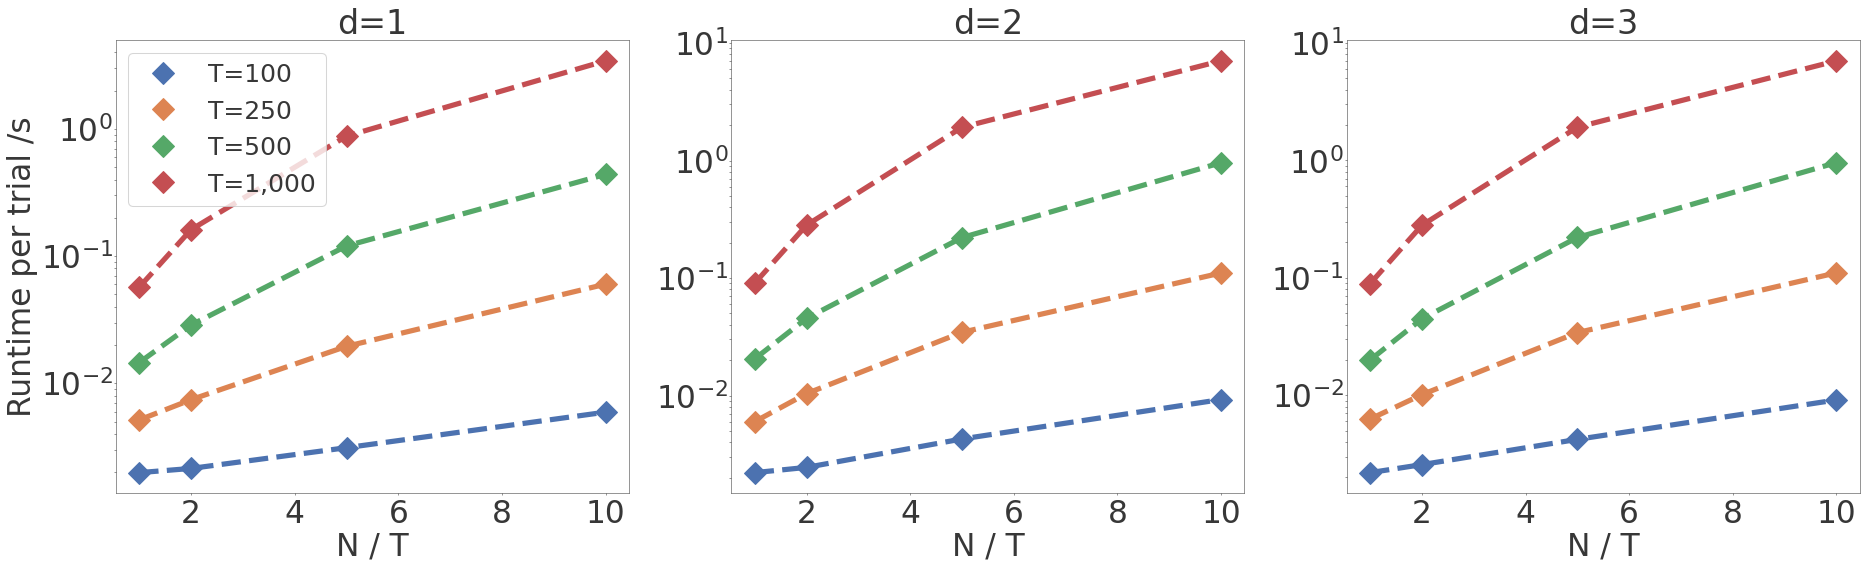

In [619]:
plot_df = df.copy()
plot_df['N'] = (plot_df['N'] / plot_df['T']).astype(int)

col_map = sns.color_palette(n_colors=len(Ts)*3)

fig, ax = plt.subplots(1,3,figsize=(30, 8), dpi=75)
for i, d in enumerate([1,2,3]):
    for col_i, T in enumerate([100,  250,  500, 1000]):
        rview = (plot_df['d'] == d) & (plot_df['T']==T)
        x = plot_df.loc[rview, 'N']
        y = (plot_df.loc[rview,'duration'] / plot_df.loc[rview,'n_trials'])#.map(np.log)
        ax[i].plot(x, y, 'D', c=col_map[col_i], label=f'T={T:,}')
        ax[i].plot(x, y, '--', c=col_map[col_i])
        ax[i].set_title(f'd={d}')
        ax[i].set_xlabel('N / T')
#         ax[i].set_ylim(-7,2.2)
        ax[i].set_yscale('log')
        ax[i].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].legend()

ax[0].set_ylabel('Runtime per trial /s')
plt.savefig('nonlinear_ar_runtime.png')
plt.show()

In [590]:

plot_df = df.copy()
plot_df['N'] = (plot_df['N'] / plot_df['T']).astype(int).map(lambda x: f"{x}T")
plot_df = plot_df.loc[:, ['d','p_acc', 'T', 'N']]
plot_df = plot_df.set_index(['d','T','N']).unstack('N')
plot_df.columns = plot_df.columns.get_level_values(1)

plot_df.to_csv('nonlinear_ar_t_exp.csv')
plot_df.loc[:,['1T', '2T', '5T', '10T']]

N           1T      2T      5T     10T
d T                                   
1 100   0.0016  0.0170  0.1422  0.3460
  250   0.0042  0.0392  0.2356  0.4664
  500   0.0106  0.0884  0.3640  0.5898
  1000  0.0130  0.1026  0.3938  0.6070
2 100   0.0002  0.0080  0.1248  0.3416
  250   0.0000  0.0000  0.0012  0.0114
  500   0.0000  0.0000  0.0028  0.0296
  1000  0.0000  0.0000  0.0092  0.0600
3 100   0.0000  0.0000  0.0034  0.0394
  250   0.0000  0.0000  0.0004  0.0094
  500   0.0000  0.0000  0.0000  0.0014
  1000  0.0000  0.0000  0.0000  0.0000

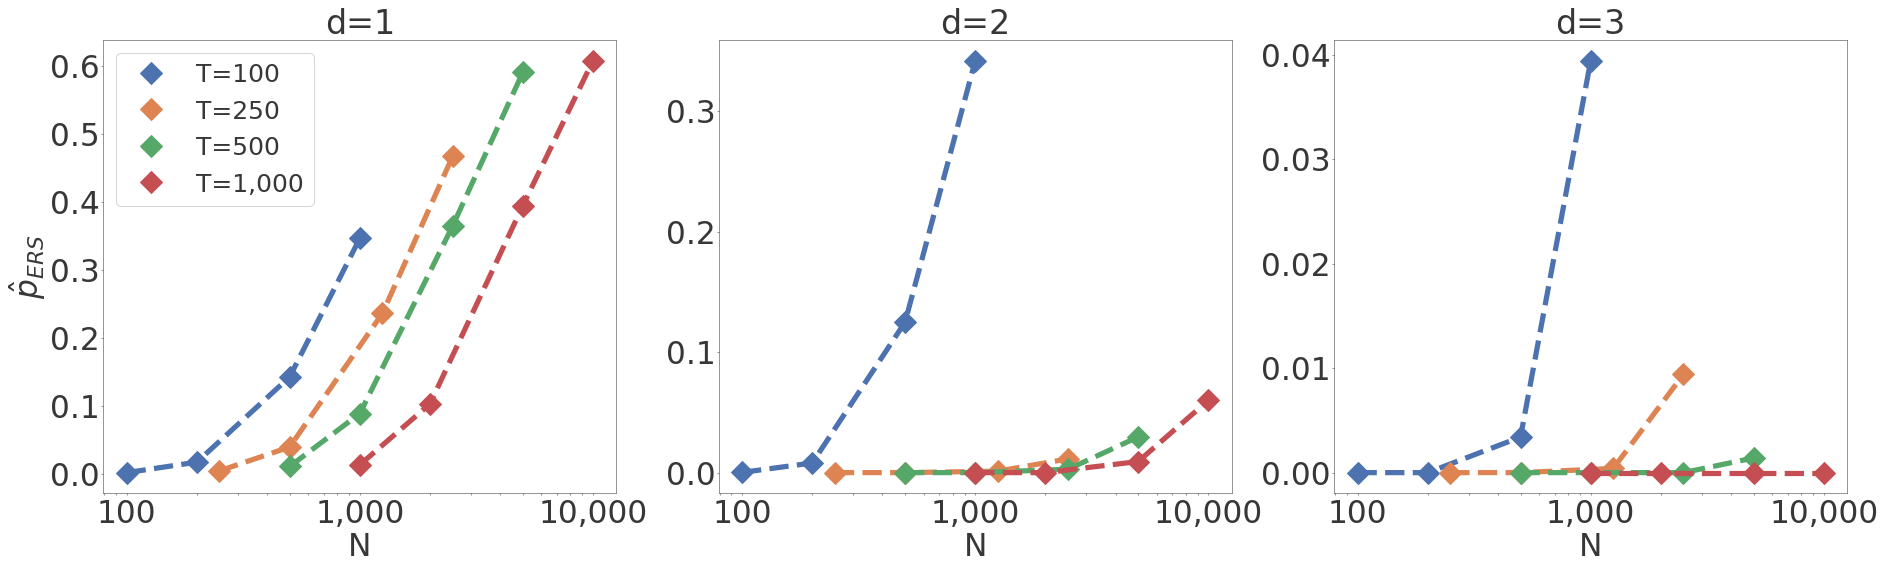

In [620]:
plot_df = df.copy()

col_map = sns.color_palette(n_colors=len(Ts)*3)

fig, ax = plt.subplots(1,3,figsize=(30, 8), dpi=75)
for i, d in enumerate([1,2,3]):
    for col_i, T in enumerate([100, 250,  500, 1000]):
#         if T == 100:
#             continue
        rview = (plot_df['d'] == d) & (plot_df['T']==T) #& (plot_df['p_acc'] > 0)
        x = plot_df.loc[rview, 'N']
        y = plot_df.loc[rview,'p_acc']
        ax[i].plot(x, y, 'D', c=col_map[col_i], label=f'T={T:,}')
        ax[i].plot(x, y, '--', c=col_map[col_i])
        ax[i].set_title(f'd={d}')
        ax[i].set_xlabel('N')
        ax[i].set_xscale('log')
#         ax[i].set_yscale('log')
        ax[i].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].legend()

ax[0].set_ylabel('$\hat{p}_{ERS}$')
plt.savefig('nonlinear_ar_t_exp_with100.png')
plt.show()

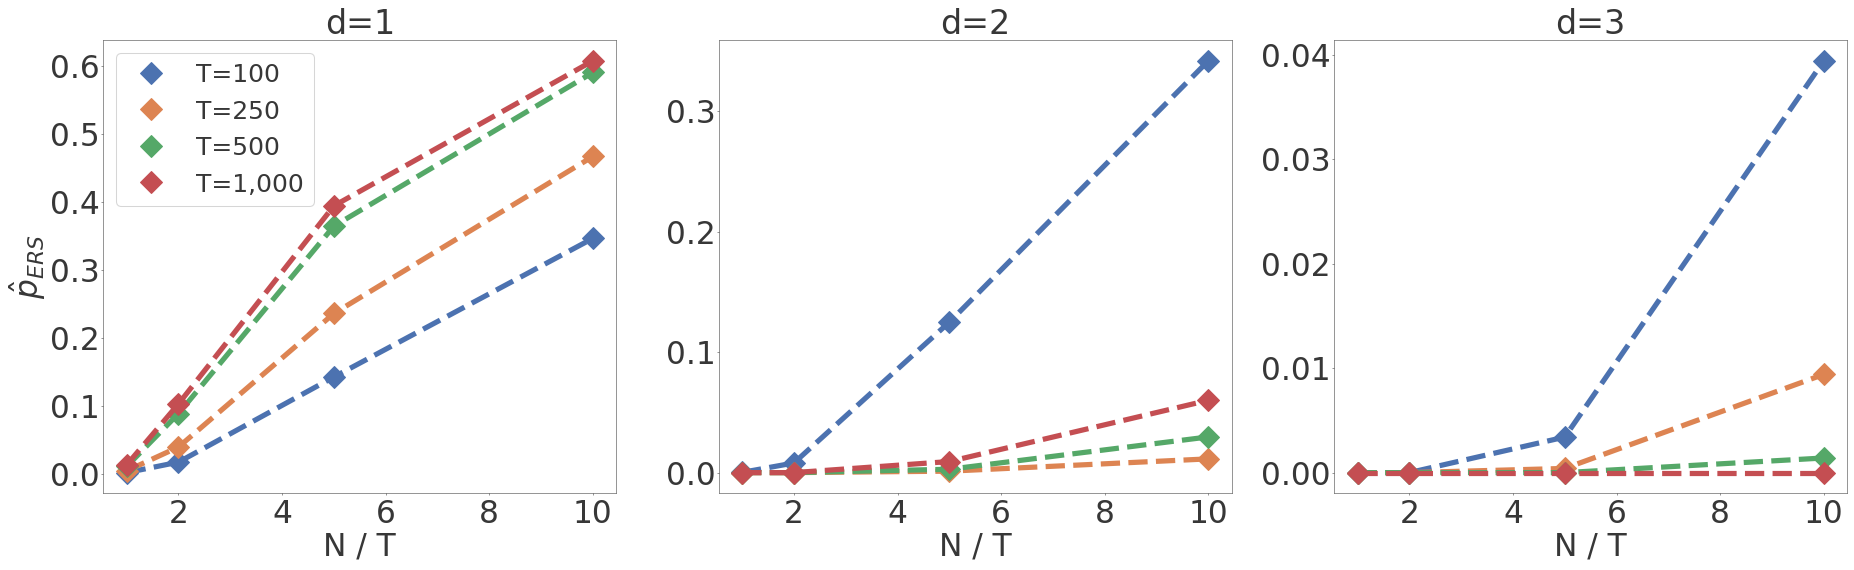

In [621]:
plot_df = df.copy()
plot_df['N'] = (plot_df['N'] / plot_df['T']).astype(int)

col_map = sns.color_palette(n_colors=len(Ts)*3)

fig, ax = plt.subplots(1,3,figsize=(30, 8), dpi=75)
for i, d in enumerate([1,2,3]):
    for col_i, T in enumerate([100,250,  500, 1000]):
#         if T == 100:
#             continue
        rview = (plot_df['d'] == d) & (plot_df['T']==T) #& (plot_df['p_acc'] > 0 )
        x = plot_df.loc[rview, 'N']
        y = plot_df.loc[rview,'p_acc']
        ax[i].plot(x, y, 'D', c=col_map[col_i], label=f'T={T:,}')
        ax[i].plot(x, y, '--', c=col_map[col_i])
        ax[i].set_title(f'd={d}')
        ax[i].set_xlabel('N / T')
#         ax[i].set_ylim(0,0.8)
#         ax[i].set_yscale('symlog')
        
        ax[i].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].legend()

ax[0].set_ylabel('$\hat{p}_{ERS}$')
plt.savefig('nonlinear_ar_pacc_relative_yscale_with100.png')
plt.show()

# Non linear AR dimension experiment

In [622]:
fp = '/data/greyostrich/oxwasp/oxwasp18/thornton/EnsembleRejectionSampler/nonlinear_ar_results_d_trials.csv'
df = pd.read_csv(fp)

In [623]:
ds = df['d'].unique()
Ts = df['T'].unique()

In [578]:
df[df['d']==7]

,Unnamed: 0,n_trials,n_accepts,p_acc,duration,N,T,d
26,26,1000,0,0.000,47.722291,5000,25,7
33,33,1000,2,0.002,170.959644,10000,25,7
58,58,1000,0,0.000,95.213076,5000,50,7
65,65,1000,0,0.000,344.872710,10000,50,7


In [624]:

sns.set_theme(style='ticks', font_scale=0.75, rc=multi_plot_params)

In [625]:
plot_df = df.copy()
plot_df = plot_df.loc[:, ['d','p_acc', 'T', 'N']]
plot_df['p_acc'] = plot_df['p_acc']
plot_df = plot_df.set_index(['d','T','N']).unstack('d')
plot_df.columns = plot_df.columns.get_level_values(1)
plot_df.fillna('-', inplace=True)
plot_df.to_csv('./nonlinear_d_exp.csv')
plot_df

d              1      2      3      4      5      6      7    8
T   N                                                          
25  100    0.017  0.035  0.026    0.0      -      -      -    -
    250    0.097  0.201  0.164  0.018    0.0      -      -    -
    500    0.254  0.416  0.376  0.078    0.0      -      -    -
    1000   0.456  0.623  0.588  0.256  0.007    0.0      -    -
    5000   0.819  0.896  0.888  0.709  0.101  0.012    0.0    -
    10000  0.898  0.956  0.946  0.833  0.237  0.034  0.002  0.0
50  100    0.011  0.008    0.0      -      -      -      -    -
    250    0.072  0.106  0.006    0.0      -      -      -    -
    500    0.232  0.302  0.046  0.001    0.0      -      -    -
    1000   0.429   0.53  0.156   0.01    0.0      -      -    -
    5000   0.805  0.862  0.651  0.197  0.038  0.007    0.0    -
    10000  0.895  0.932  0.787  0.383  0.115  0.022    0.0    -
100 100    0.000      -      -      -      -      -      -    -
    250    0.031  0.018    0.0      -      -      -      -    -
    500    0.127  0.103  0.003    0.0      -      -      -    -
    1000   0.327  0.319  0.038    0.0      -      -      -    -
    5000   0.756  0.764  0.451  0.062  0.002    0.0      -    -
    10000  0.870  0.873  0.655  0.207  0.018    0.0      -    -
200 100    0.000      -      -      -      -      -      -    -
    250    0.006    0.0      -      -      -      -      -    -
    500    0.043  0.001    0.0      -      -      -      -    -
    1000   0.172  0.013    0.0      -      -      -      -    -
    5000   0.670  0.283  0.152  0.009    0.0      -      -    -
    10000  0.802  0.481   0.37  0.053    0.0      -      -    -

In [581]:

plot_df = df.copy()
plot_df = plot_df.loc[:, ['d','p_acc', 'T', 'N']]
plot_df = plot_df.set_index(['d','T','N']).unstack('N')
plot_df.columns = plot_df.columns.get_level_values(1)
filled_na_df = plot_df.fillna(0).stack().reset_index()
filled_na_df.rename({0:'p_acc'}, axis=1, inplace=True)
# filled_na_df

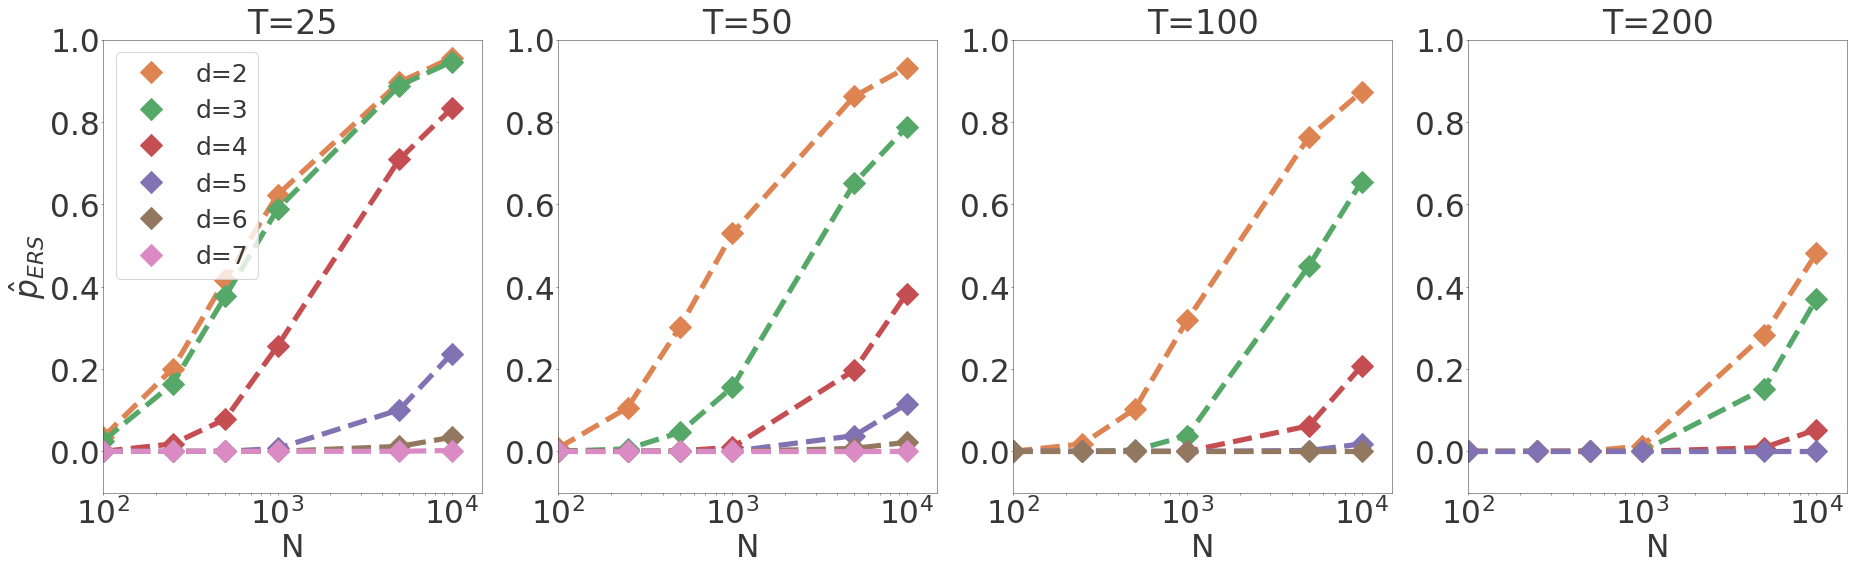

In [626]:
plot_df = filled_na_df.copy()
# plot_df['N'] = (plot_df['N'] / plot_df['T']).astype(int)

col_map = sns.color_palette(n_colors=len(Ts)*len(ds))

fig, ax = plt.subplots(1,len(Ts),figsize=(30, 8), dpi=75)
for i, T in enumerate(Ts):
    for col_i, d in enumerate(ds):
        if (d == 1) | (d==8):
            continue
        rview = (plot_df['d'] == d) & (plot_df['T']==T) #& (plot_df['p_acc'] > 0)
        x = plot_df.loc[rview, 'N']
        y = plot_df.loc[rview,'p_acc']
        ax[i].plot(x, y, 'D', c=col_map[col_i], label=f'd={d:,}')
        ax[i].plot(x, y, '--', c=col_map[col_i])
#         ax[i].set_title(f'd={d}')
        ax[i].set_title(f'T={T}')
        ax[i].set_xlabel('N')
        ax[i].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax[i].set_xscale('log')
        ax[i].set_ylim(-0.1,1)
        ax[i].set_xlim(100,10**4 + 5000)
#         ax[i].set_yscale('log')
#         ax[i].set_yticks([0.1,0.2, minor=True)

ax[0].legend()

ax[0].set_ylabel('$\hat{p}_{ERS}$')
plt.savefig('./nonlinear_d_exp.png')
plt.show()